
## Time series clustering exercise
## Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. Download it programmatically and move it to PUIdata

Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
## You can use zipfile module in python to unzip the files

it should be installed in your system, but if it is not you can get the code with wget from here https://github.com/python/cpython/blob/2.7/Lib/zipfile.py remembering to use the raw link (or you can use the usual shell commands)



## Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))
## TASKS:

1. get and prep your data.
2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
in **a few** clusters (as discussed there is no real good, sound way to 
decide what a good number is here. try a few options, keeping in mind 
a few is more than a couple, but i recommand you stay within the 
single digit numbers)

3. plot the cluster centers (if you used K means those are the means of 
the clusters). you can plot for example the cluster centers overlayed on 
each time series (using the alpha channel to control the opacity in the 
plot may be helpful here).

4. Use another clustering algorithm (of your choice)

5. overlay your data on a NYC map: you can use shapefiles for the 
zip codes and different colors for different clusters

6. Compare the results of the 2 algorithms

7. attempt an interpretation. this is dangerous ground: clustering is 
an exploratory tool so you do not want to jump to conclusions because 
you see some clusters! but seeing structure in your data can inform 
your next moves as an investigator. 

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. Always when you apply a moachine learning model you should standardize the data or whiten it. These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening standardizes each feature" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

#### So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.

From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.


In [1]:
!wget https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp{00..14}totals.zip?raw=true

--2018-12-12 23:36:02--  https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp00totals.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip [following]
--2018-12-12 23:36:03--  https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp00totals.zip [following]
--2018-12-12 23:36:03--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp00totals.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.208.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... co

Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip [following]
--2018-12-12 23:36:06--  https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp07totals.zip [following]
--2018-12-12 23:36:06--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp07totals.zip
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 667754 (652K) [application/zip]
Saving to: ‘zbp07totals.zip?raw=true’

zbp07totals.zip?raw 100%[===================>] 652.10K  --.-KB/s    in 0.1s    

2018-12-12 23:36:06 (5.29 MB/s) - ‘zbp07totals.

HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp14totals.zip [following]
--2018-12-12 23:36:09--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp14totals.zip
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733763 (717K) [application/zip]
Saving to: ‘zbp14totals.zip?raw=true’

zbp14totals.zip?raw 100%[===================>] 716.57K  --.-KB/s    in 0.1s    

2018-12-12 23:36:09 (6.68 MB/s) - ‘zbp14totals.zip?raw=true’ saved [733763/733763]

FINISHED --2018-12-12 23:36:09--
Total wall clock time: 7.1s
Downloaded: 15 files, 9.7M in 1.7s (5.67 MB/s)


In [2]:
!wget https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp{94..99}totals.zip?raw=true

--2018-12-12 23:36:15--  https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip [following]
--2018-12-12 23:36:16--  https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp94totals.zip [following]
--2018-12-12 23:36:16--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp94totals.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.208.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... co

In [1]:
import pandas as pd
import zipfile
import os
import geopandas as gpd
import numpy as np
import zipfile 
import glob
from sklearn import cluster, datasets
import sklearn
#import shutil
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from functools import reduce
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp

In [2]:
os.environ["PUIDATA"] = '%s/PUIdata'%os.getenv("HOME")
os.chdir(os.getenv("PUIDATA"))
#os.getcwd()

In [3]:
# renaming all zip files from zbpfiles;
for fname in glob.glob('*raw=true'):
    os.rename(fname, fname[:15])

In [6]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip -O NYCZipcode.zip

--2018-12-12 23:36:36--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2018-12-12 23:36:37--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘NYCZipcode.zip’

NYCZipcode.zip          [    <=>             ]   1.44M  1.97MB/s    in 0.7s    

2018-12-12 23:36:38 (1.97 MB/s) - ‘NYCZipcode.zip’ saved [1514401]



In [7]:
!unzip NYCZipcode.zip

Archive:  NYCZipcode.zip
replace ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
nyczipsshp = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")

In [5]:
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [6]:
columns1 = ['19' + str(z) for z in range(94,100)]
columns2 = ['200' + str(z) for z in range(0,10)]
columns3 = [ '20' + str(z) for z in range(10, 15)]
columns = columns1 + columns2 + columns3

In [7]:
columns[:3]

['1994', '1995', '1996']

In [8]:
zbpfiles = glob.glob('zbp*.zip')

In [9]:
zbpfiles[:3]

['zbp04totals.zip', 'zbp96totals.zip', 'zbp01totals.zip']

In [10]:
for fname in zbpfiles:
    df = pd.read_csv(zipfile.ZipFile(fname).open(fname.replace('.zip', '.txt')))
    print(fname); print(df.head())

zbp04totals.zip
    zip            name empflag   emp    qp1      ap  est
0   501  HOLTSVILLE, NY     NaN    34    170     773    8
1  1001      AGAWAM, MA     NaN  8650  61626  279815  500
2  1002     AMHERST, MA     NaN  6827  41882  180175  584
3  1003     AMHERST, MA     NaN   283    971    4196   15
4  1004     AMHERST, MA     NaN   178   1122    4311   43
zbp96totals.zip
    zip             name empflag   emp    qp1      ap  est
0   501   Holtsville, NY       B     0      0       0    4
1  1000  Springfield, MA     NaN   161   1494    6671   11
2  1001       Agawam, MA     NaN  6130  37746  171045  433
3  1002      Amherst, MA     NaN  6441  32964  141756  487
4  1003      Amherst, MA     NaN    77    364    1686   13
zbp01totals.zip
    ZIP            NAME EMPFLAG   EMP    QP1      AP  EST
0   501  HOLTSVILLE, NY       B     0      0       0    6
1  1001      AGAWAM, MA     NaN  8522  64404  270625  490
2  1002     AMHERST, MA     NaN  6955  42682  182632  587
3  1003     AMHERS

zbp94totals.zip
    zip         name empflag   emp    qp1      ap  est
0  1001   Agawam, MA     NaN  6198  33601  155158  439
1  1002  Amherst, MA     NaN  6073  28924  127367  450
2  1003  Amherst, MA     NaN    68    367    1604   10
3  1004  Amherst, MA     NaN   210    844    4302   47
4  1005    Barre, MA     NaN   678   3010   13521   92


In [74]:
df = [pd.read_csv(zipfile.ZipFile(fname).open(fname.replace('.zip', '.txt'))) for fname in zbpfiles]

In [75]:
for i in range(len(zbpfiles)):
    df[i].columns = [x.lower() for x in df[i].columns]

In [80]:
df_ = [df[['zip','est']] for df in df]

In [82]:
# we want to get the number of establishments every year and we need the zipcode
for i in range(len(zbpfiles)):
    df_[i] = df_[i].rename(columns={'est': columns[i]}) 

In [84]:
#df_

In [85]:
dff = reduce(lambda x, y: pd.merge(x, y, on = 'zip', how='inner'), df_)

In [89]:
dff.head()

,zip,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1001,500,433,490,477,448,509,505,457,469,...,458,453,493,436,509,444,458,490,439,439
1,1002,584,487,587,584,570,589,586,500,558,...,571,572,563,558,582,490,560,566,467,450
2,1003,15,13,13,17,16,12,16,15,13,...,16,15,13,16,12,14,18,15,10,10
3,1004,43,47,37,18,21,31,21,41,35,...,18,16,48,19,30,31,13,23,48,47
4,1005,97,101,90,97,96,94,93,104,82,...,87,94,86,91,98,95,97,94,95,92


In [90]:
nyczipsshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [91]:
# selecting columns of interest before merging with shapefile
NYCzip = nyczipsshp[['ZIPCODE', 'geometry']]
NYCzip.columns = [['zip', 'geometry']]

In [92]:
# We would like to use the zip column to merge with our geodataframe for NYC;
# but we see that some of the dataframes have zip for this specific column and other times it is ZIP;
# let's make that uniform; so this line is getting into the above cell;
NYCzip.columns = NYCzip.columns.map('_'.join) # strangely columns were coming in form of tuples had to change them to str
NYCzip.columns

Index(['zip', 'geometry'], dtype='object')

In [93]:
# before merging we make sure the two columns on which merging happens are of the same dtype;
NYCzip.zip = NYCzip.zip.astype(int)
NYCzip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
zip         263 non-null int64
geometry    263 non-null object
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


/home/habtemariam/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [94]:
NYCzip.head()

,zip,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [95]:
NYCzip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
zip         263 non-null int64
geometry    263 non-null object
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [97]:
NYC = pd.merge(NYCzip, dff, on='zip', how='inner')

In [98]:
NYC.head()

,zip,geometry,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",84,53,57,90,98,82,74,51,...,92,95,65,101,80,51,109,78,50,51
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",570,433,493,592,675,556,569,456,...,621,726,477,674,565,476,772,546,420,406
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",586,502,527,602,699,587,581,527,...,647,721,520,713,570,519,752,577,494,505
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",492,388,422,520,580,491,488,410,...,543,623,417,597,499,416,696,479,387,381
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",1295,1049,1180,1397,1474,1332,1247,1075,...,1457,1605,1161,1523,1331,1118,1736,1228,1015,985


In [100]:
len(NYC)

243

In [104]:
#NYC.info()

In [105]:
NYC.columns

Index(['zip', 'geometry', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [106]:
# 20 years of data and 263 zipcodes
NYC.shape

(243, 23)

In [107]:
cleancsb = NYC.set_index('zip')

In [108]:
cleancsb.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
11436,"POLYGON ((1038098.251871482 188138.3800067157,...",84,53,57,90,98,82,74,51,58,...,92,95,65,101,80,51,109,78,50,51
11213,"POLYGON ((1001613.712964058 186926.4395172149,...",570,433,493,592,675,556,569,456,473,...,621,726,477,674,565,476,772,546,420,406
11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",586,502,527,602,699,587,581,527,541,...,647,721,520,713,570,519,752,577,494,505
11225,"POLYGON ((995908.3654508889 183617.6128015518,...",492,388,422,520,580,491,488,410,409,...,543,623,417,597,499,416,696,479,387,381
11218,"POLYGON ((991997.1134308875 176307.4958601296,...",1295,1049,1180,1397,1474,1332,1247,1075,1149,...,1457,1605,1161,1523,1331,1118,1736,1228,1015,985


In [109]:
cleancsb.index = cleancsb.index.sort_values()

In [110]:
cleancsb.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10001,"POLYGON ((1038098.251871482 188138.3800067157,...",84,53,57,90,98,82,74,51,58,...,92,95,65,101,80,51,109,78,50,51
10002,"POLYGON ((1001613.712964058 186926.4395172149,...",570,433,493,592,675,556,569,456,473,...,621,726,477,674,565,476,772,546,420,406
10003,"POLYGON ((1011174.275535807 183696.33770971, 1...",586,502,527,602,699,587,581,527,541,...,647,721,520,713,570,519,752,577,494,505
10004,"POLYGON ((995908.3654508889 183617.6128015518,...",492,388,422,520,580,491,488,410,409,...,543,623,417,597,499,416,696,479,387,381
10004,"POLYGON ((991997.1134308875 176307.4958601296,...",1295,1049,1180,1397,1474,1332,1247,1075,1149,...,1457,1605,1161,1523,1331,1118,1736,1228,1015,985


In [111]:
cleancsb.shape

(243, 22)

In [112]:
for i in range(len(cleancsb)):
    cleancsb.iloc[i,1:] = (cleancsb.iloc[i,1:] - cleancsb.iloc[i,1:].mean()) / cleancsb.iloc[i,1:].std()

In [113]:
cleancsb.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10001,"POLYGON ((1038098.251871482 188138.3800067157,...",0.395415,-1.193568,-0.988538,0.702960,1.113020,0.292900,-0.117160,-1.296083,-0.937280,...,0.805475,0.959248,-0.578478,1.266793,0.190385,-1.296083,1.676853,0.087870,-1.347340,-1.296083
10002,"POLYGON ((1001613.712964058 186926.4395172149,...",0.069398,-1.186307,-0.636364,0.271044,1.031799,-0.058923,0.060232,-0.975496,-0.819678,...,0.536850,1.499252,-0.783015,1.022634,0.023569,-0.792181,1.920875,-0.150580,-1.305462,-1.433782
10003,"POLYGON ((1011174.275535807 183696.33770971, 1...",-0.104191,-1.114040,-0.813490,0.088161,1.254297,-0.092169,-0.164301,-0.813490,-0.645182,...,0.629152,1.518781,-0.897644,1.422605,-0.296543,-0.909666,1.891464,-0.212389,-1.210216,-1.077974
10004,"POLYGON ((995908.3654508889 183617.6128015518,...",-0.046933,-1.149098,-0.788775,0.249804,0.885668,-0.057531,-0.089324,-0.915948,-0.926545,...,0.493552,1.341371,-0.841764,1.065830,0.027251,-0.852361,2.115007,-0.184704,-1.159696,-1.223282
10004,"POLYGON ((991997.1134308875 176307.4958601296,...",-0.049486,-1.180649,-0.578281,0.419533,0.773596,0.120649,-0.270200,-1.061095,-0.720826,...,0.695427,1.375964,-0.665648,0.998909,0.116050,-0.863371,1.978331,-0.357567,-1.336988,-1.474935


In [114]:
cleancsb.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.124314,-0.804548,-0.327877,0.310202,0.491133,0.170685,-0.085442,-0.651203,-0.463980,0.277438,...,0.360346,0.750864,-0.349822,0.569032,0.190658,-0.560743,1.140232,-0.180408,-0.900371,-1.009820
std,0.657365,0.812842,0.741319,0.560468,0.718749,0.538337,0.584720,0.753154,0.774400,0.542232,...,0.587235,0.924538,0.799265,0.842238,0.540521,0.775382,1.092847,0.553115,0.938837,1.116464
min,-1.922128,-1.897567,-1.666750,-1.435979,-1.649178,-1.478227,-1.760021,-1.892837,-1.821346,-1.559909,...,-1.696628,-2.020149,-2.105643,-2.113009,-1.910232,-2.054090,-2.019528,-1.841075,-2.367927,-3.459962
25%,-0.159339,-1.319671,-0.760883,0.087489,0.282918,-0.093326,-0.379639,-1.090628,-0.929749,0.076569,...,0.170918,0.477327,-0.831585,0.358136,-0.011155,-1.002660,0.778599,-0.463519,-1.470869,-1.645204
50%,0.063610,-1.105014,-0.566623,0.409915,0.744276,0.157177,-0.131412,-0.926456,-0.732544,0.327569,...,0.512900,1.165268,-0.610926,0.917255,0.223560,-0.816361,1.613328,-0.235929,-1.207515,-1.322172
75%,0.375657,-0.697991,-0.112660,0.636179,0.948360,0.467819,0.175459,-0.536456,-0.189823,0.580074,...,0.690089,1.375872,-0.119517,1.098092,0.513556,-0.349955,1.844668,-0.000853,-0.710477,-0.710121
max,3.963718,2.216083,2.705124,1.781514,1.505138,2.285662,2.655893,1.698668,2.143528,2.152288,...,1.845008,2.405536,2.576381,1.738911,1.397476,2.040039,3.406371,2.144307,2.228009,3.212291


In [115]:
NYC.describe()

,zip,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,10697.687243,903.263374,812.234568,865.695473,919.263374,937.012346,906.395062,885.600823,832.506173,850.288066,...,923.489712,964.320988,864.934156,948.156379,911.337449,843.716049,997.716049,875.000000,801.930041,786.374486
std,585.251017,1230.366627,1173.207861,1234.064543,1212.799049,1198.395461,1223.284020,1196.590739,1198.182206,1207.629794,...,1196.968869,1215.016806,1229.229795,1203.064486,1230.869951,1208.995347,1236.510051,1196.521024,1170.402664,1142.732854
min,10001.000000,5.000000,2.000000,5.000000,2.000000,3.000000,3.000000,5.000000,2.000000,2.000000,...,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,5.000000,1.000000,1.000000
25%,10121.500000,202.500000,178.000000,190.000000,190.000000,190.500000,191.500000,208.000000,180.000000,185.000000,...,203.000000,186.500000,192.500000,187.000000,195.000000,185.500000,179.000000,200.500000,178.000000,169.500000
50%,10464.000000,537.000000,457.000000,491.000000,545.000000,580.000000,536.000000,534.000000,472.000000,482.000000,...,560.000000,612.000000,490.000000,597.000000,541.000000,482.000000,638.000000,525.000000,448.000000,438.000000
75%,11237.500000,1015.000000,937.000000,951.000000,1061.500000,1095.500000,1034.500000,996.000000,940.500000,955.000000,...,1073.000000,1157.000000,953.000000,1115.000000,1019.000000,950.000000,1237.000000,989.500000,903.000000,896.000000
max,11697.000000,7370.000000,7075.000000,7188.000000,7472.000000,7241.000000,7312.000000,7084.000000,7154.000000,7233.000000,...,7305.000000,7235.000000,7317.000000,7227.000000,7415.000000,7254.000000,7369.000000,7141.000000,7088.000000,6999.000000


In [116]:
len(cleancsb)

243

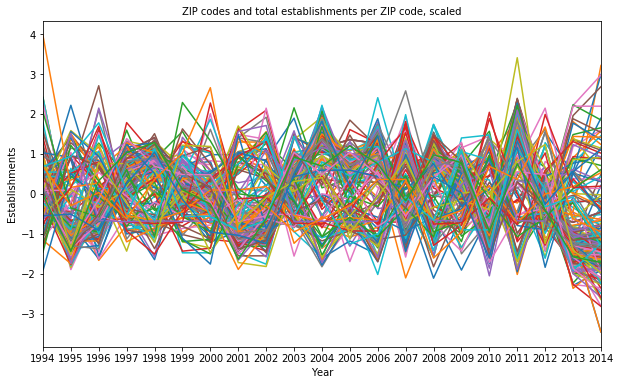

In [120]:
# we can plot the standardized dataframe
pl.figure(figsize=(10,6))
for i in range(len(cleancsb)):
    pl.plot(cleancsb.iloc[i,1:])
pl.xlim('1994','2014')
pl.title('ZIP codes and total establishments per ZIP code, scaled', fontsize=10)
pl.xlabel('Year')
pl.ylabel('Establishments');

In [125]:
cleancsb.mean(axis=1)
cleancsb.mean(axis=1).shape
cleancsb.std(axis=1)
cleancsb.std(axis=1).shape

(243,)

In [126]:
#km = KMeans(n_clusters=nc, random_state=444).fit(vals)
X=np.asarray(cleancsb.iloc[:,1:])
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5721428017763318
For n_clusters =3, the average silhouette_score is :0.5384936002674022
For n_clusters =4, the average silhouette_score is :0.49735104320320284
For n_clusters =5, the average silhouette_score is :0.3238831914694938
For n_clusters =6, the average silhouette_score is :0.26490051616687854
For n_clusters =7, the average silhouette_score is :0.2353994389611605
For n_clusters =8, the average silhouette_score is :0.23526056551215188
For n_clusters =9, the average silhouette_score is :0.1974273724304935
For n_clusters =10, the average silhouette_score is :0.14928769189165836


#### We see that the ideal number is two;

In [149]:
km.labels_.shape

(243,)

In [150]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=324)
cluster_labels = km.fit_predict(X)

In [151]:
centroids =km.cluster_centers_

In [152]:
NYC['clusters'] = cluster_labels

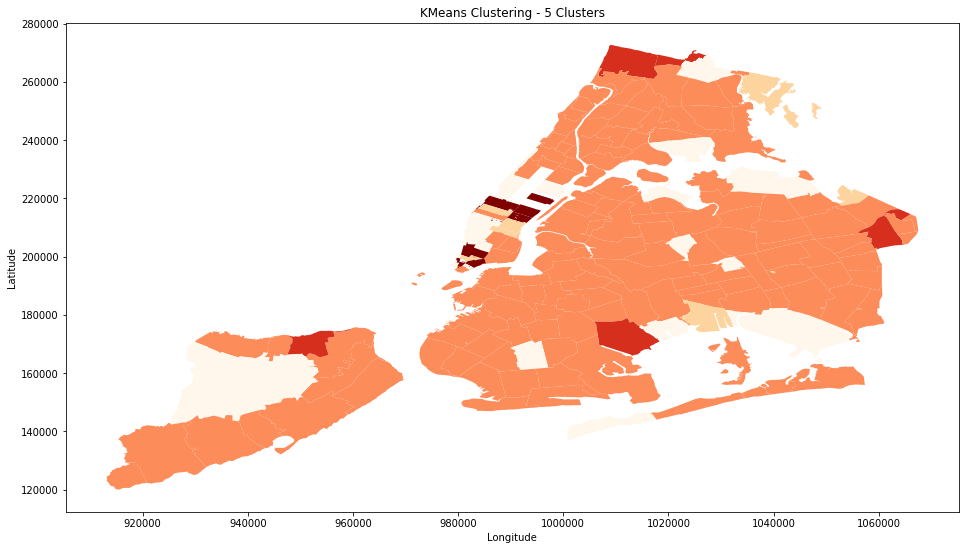

In [163]:
f, ax = plt.subplots(figsize=(16,9))
NYC.plot(alpha=1.0, linewidth=2, column = 'clusters', cmap = 'OrRd', ax = ax)
plt.title('KMeans Clustering - 5 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

Figure 3:
cloropleth of cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

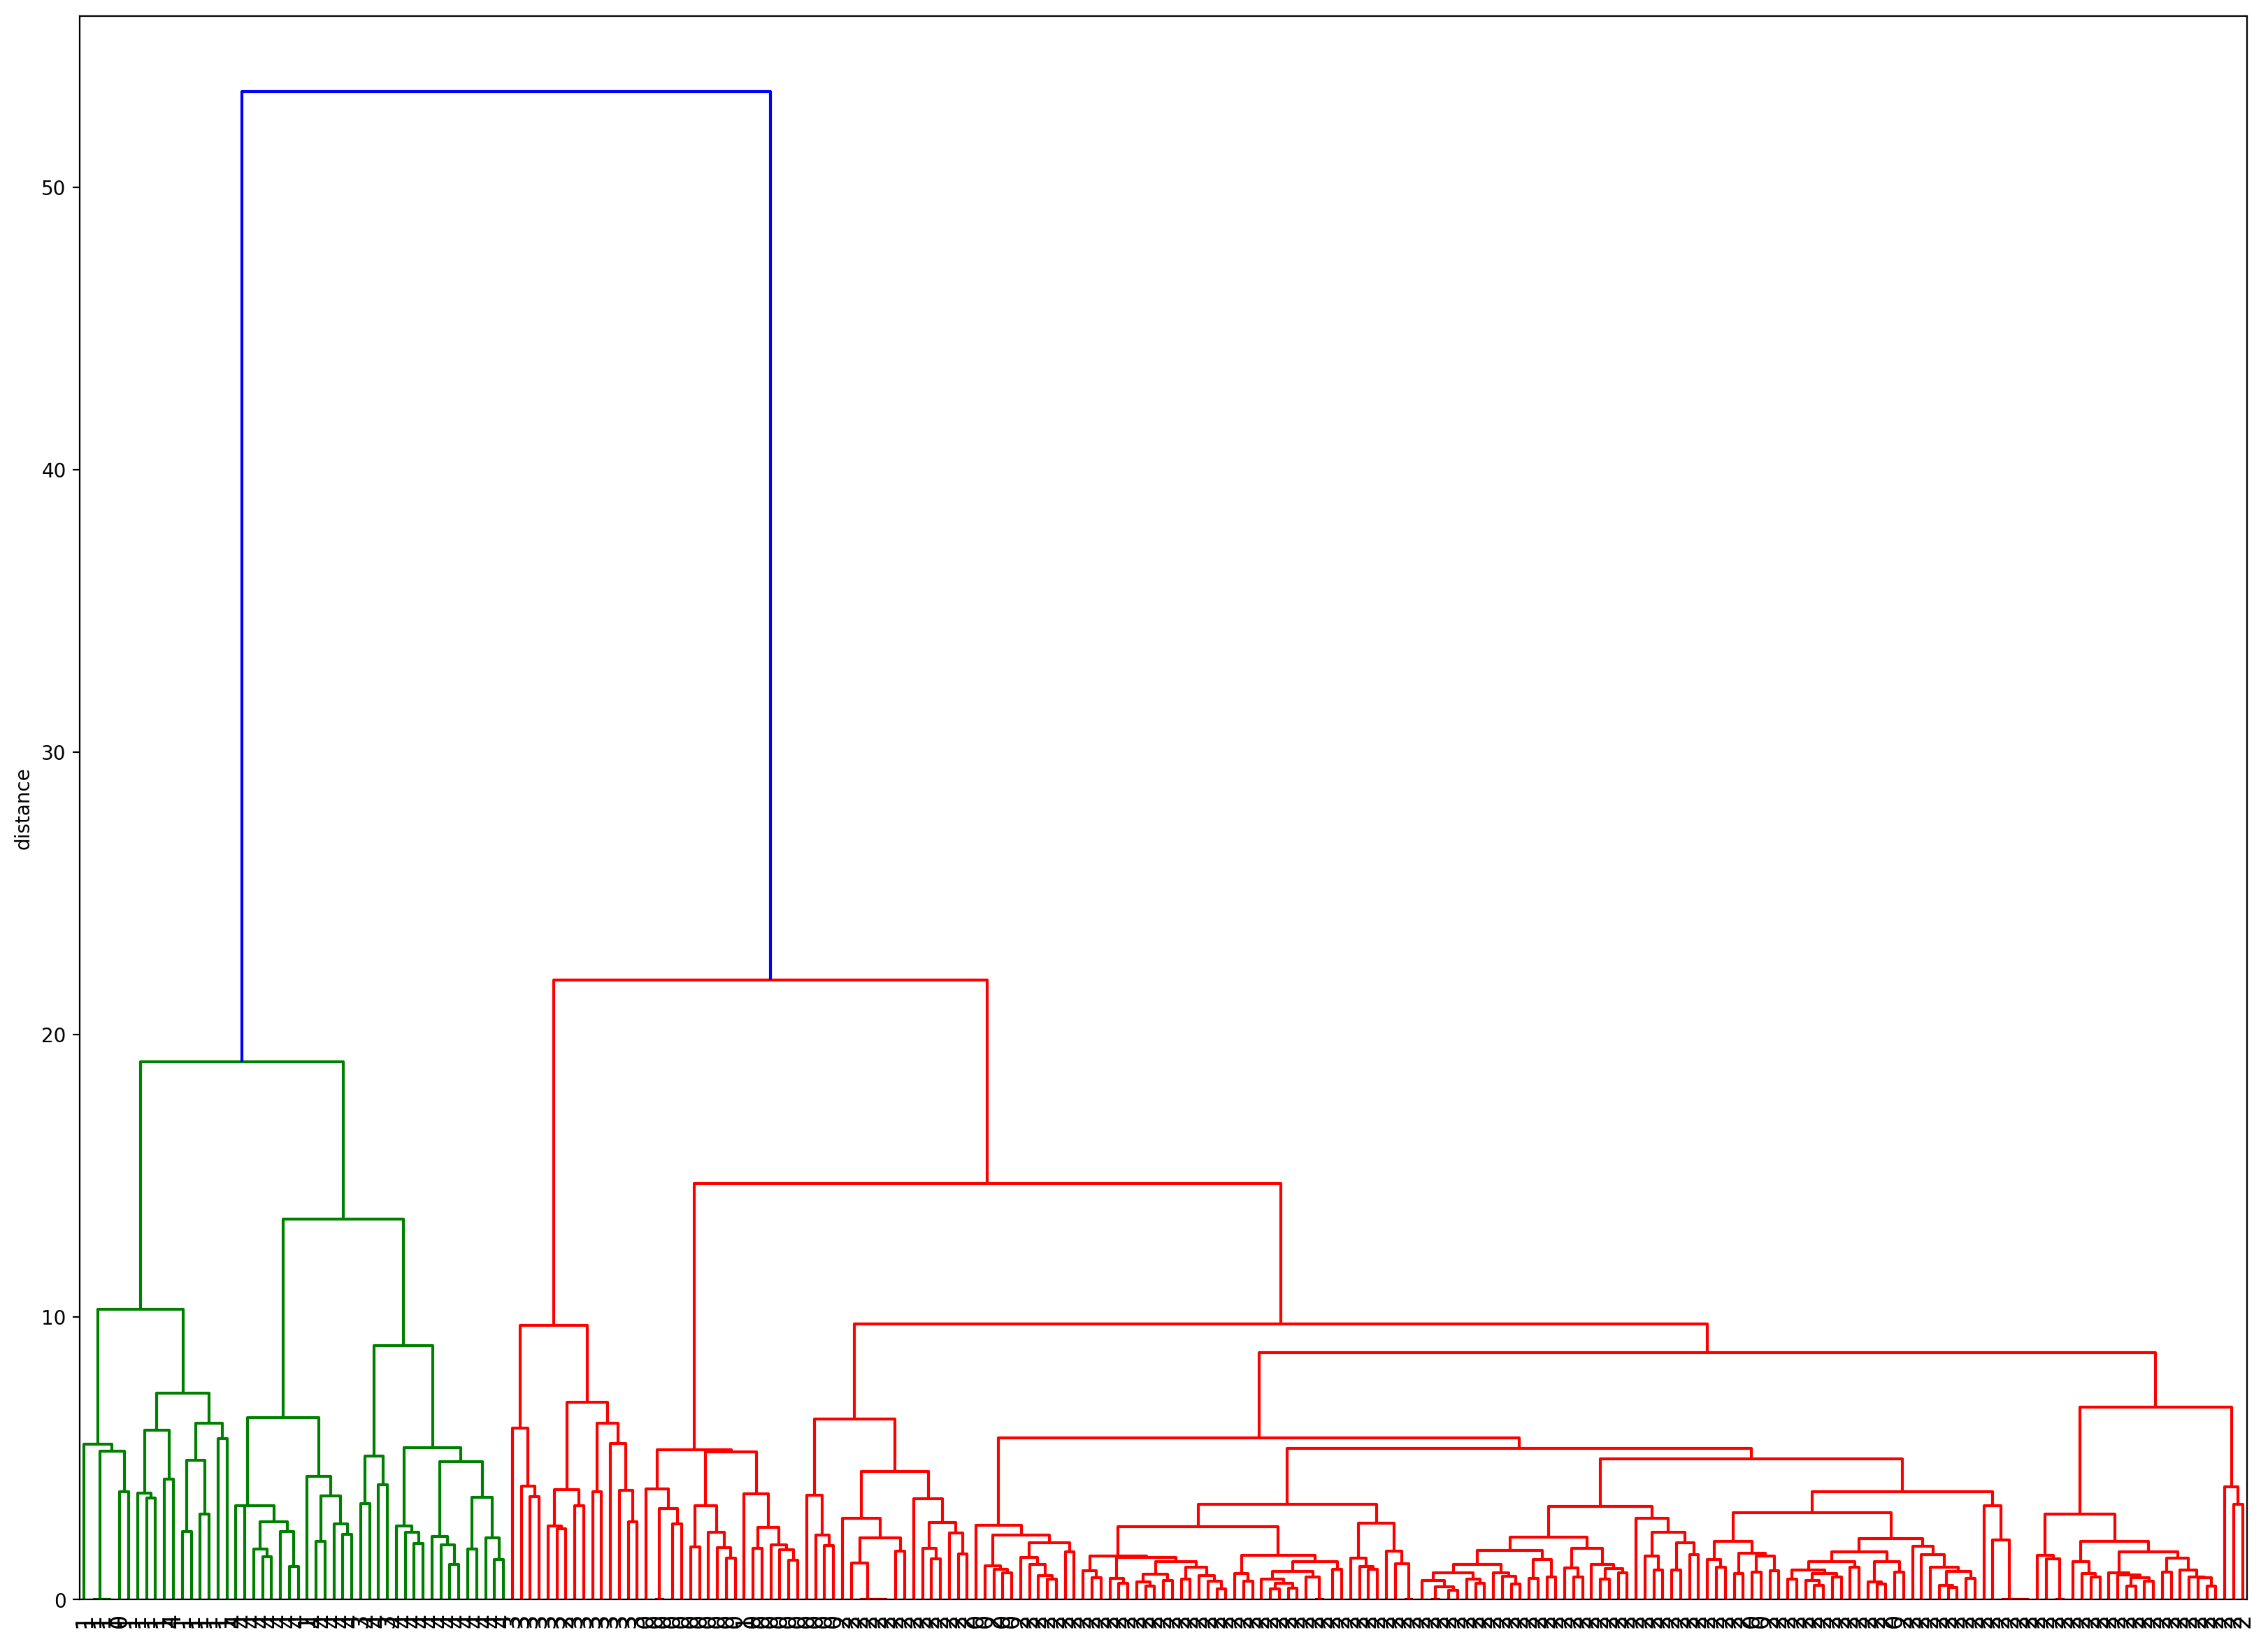

In [177]:
fig = pl.figure(figsize=(20,15), dpi=200)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(cleancsb.iloc[:,1:], method='ward'),
                               labels = cluster_labels,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=12.)  # font size for the x axis labels)